# 1. Extracción de datos

In [1]:
#standard(stats)
stats = ["player","nationality","position","squad","age","birth_year","games","games_starts","minutes","goals","assists","pens_made","pens_att","cards_yellow","cards_red","goals_per90","assists_per90","goals_assists_per90","goals_pens_per90","goals_assists_pens_per90","xg","npxg","xa","xg_per90","xa_per90","xg_xa_per90","npxg_per90","npxg_xa_per90"]
#shooting(shooting)
shooting2 = ["minutes_90s","goals","pens_made","pens_att","shots_total","shots_on_target","shots_free_kicks","shots_on_target_pct","shots_total_per90","shots_on_target_per90","goals_per_shot","goals_per_shot_on_target","xg","npxg","npxg_per_shot","xg_net","npxg_net"]
#passing(passing)
passing2 = ["passes_completed","passes","passes_pct","passes_total_distance","passes_progressive_distance","passes_completed_short","passes_short","passes_pct_short","passes_completed_medium","passes_medium","passes_pct_medium","passes_completed_long","passes_long","passes_pct_long","assists","xa","xa_net","assisted_shots","passes_into_final_third","passes_into_penalty_area","crosses_into_penalty_area","progressive_passes"]
#passtypes(passing_types)
passing_types2 = ["passes","passes_live","passes_dead","passes_free_kicks","through_balls","passes_pressure","passes_switches","crosses","corner_kicks","corner_kicks_in","corner_kicks_out","corner_kicks_straight","passes_ground","passes_low","passes_high","passes_left_foot","passes_right_foot","passes_head","throw_ins","passes_other_body","passes_completed","passes_offsides","passes_oob","passes_intercepted","passes_blocked"]
#goal and shot creation(gca)
gca2 = ["sca","sca_per90","sca_passes_live","sca_passes_dead","sca_dribbles","sca_shots","sca_fouled", "sca_defense", "gca","gca_per90","gca_passes_live","gca_passes_dead","gca_dribbles","gca_shots","gca_fouled", "gca_defense"]
#defensive actions(defense)
defense2 = ["tackles","tackles_won","tackles_def_3rd","tackles_mid_3rd","tackles_att_3rd","dribble_tackles","dribbles_vs","dribble_tackles_pct","dribbled_past","pressures","pressure_regains","pressure_regain_pct","pressures_def_3rd","pressures_mid_3rd","pressures_att_3rd","blocks","blocked_shots","blocked_shots_saves","blocked_passes","interceptions","clearances","errors"]
#possession(possession)
possession2 = ["touches","touches_def_pen_area","touches_def_3rd","touches_mid_3rd","touches_att_3rd","touches_att_pen_area","touches_live_ball","dribbles_completed","dribbles","dribbles_completed_pct","players_dribbled_past","nutmegs","carries","carry_distance","carry_progressive_distance","progressive_carries","carries_into_final_third","carries_into_penalty_area","pass_targets","passes_received","passes_received_pct","miscontrols","dispossessed"]
#playingtime(playingtime)
playingtime2 = ["games","minutes","minutes_per_game","minutes_pct","games_starts","minutes_per_start","games_subs","minutes_per_sub","unused_subs","points_per_match","on_goals_for","on_goals_against","plus_minus","plus_minus_per90","plus_minus_wowy","on_xg_for","on_xg_against","xg_plus_minus","xg_plus_minus_per90","xg_plus_minus_wowy"]
#miscallaneous(misc)
misc2 = ["cards_yellow","cards_red","cards_yellow_red","fouls","fouled","offsides","crosses","interceptions","tackles_won","pens_won","pens_conceded","own_goals","ball_recoveries","aerials_won","aerials_lost","aerials_won_pct"]
#goalkeeping(keepers)
keepers = ["player","nationality","position","squad","age","birth_year","games_gk","games_starts_gk","minutes_gk","goals_against_gk","goals_against_per90_gk","shots_on_target_against","saves","save_pct","wins_gk","draws_gk","losses_gk","clean_sheets","clean_sheets_pct","pens_att_gk","pens_allowed","pens_saved","pens_missed_gk"]
#advance goalkeeping(keepersadv)
keepersadv2 = ["minutes_90s","goals_against_gk","pens_allowed","free_kick_goals_against_gk","corner_kick_goals_against_gk","own_goals_against_gk","psxg_gk","psnpxg_per_shot_on_target_against","psxg_net_gk","psxg_net_per90_gk","passes_completed_launched_gk","passes_launched_gk","passes_pct_launched_gk","passes_gk","passes_throws_gk","pct_passes_launched_gk","passes_length_avg_gk","goal_kicks","pct_goal_kicks_launched","goal_kick_length_avg","crosses_gk","crosses_stopped_gk","crosses_stopped_pct_gk","def_actions_outside_pen_area_gk","def_actions_outside_pen_area_per90_gk","avg_distance_def_actions_gk"]

Importamos las librerías necesarias. Además, permitimos mostrar más columnas y filas para trabajar con comodidad

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import sys, getopt
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Las siguientes funciones extraen los datos en un dataframe

def get_tables(url):
    res = requests.get(url)
    comm = re.compile("<!--|-->")
    soup = BeautifulSoup(comm.sub("",res.text),'lxml')
    all_tables = soup.findAll("tbody")
    team_table = all_tables[0]
    player_table = all_tables[1]
    return player_table, team_table

def get_frame(features, player_table):
    pre_df_player = dict()
    features_wanted_player = features
    rows_player = player_table.find_all('tr')
    for row in rows_player:
        if(row.find('th',{"scope":"row"}) != None):
    
            for f in features_wanted_player:
                cell = row.find("td",{"data-stat": f})
                a = cell.text.strip().encode()
                text=a.decode("utf-8")
                if(text == ''):
                    text = '0'
                if((f!='player')&(f!='nationality')&(f!='position')&(f!='squad')&(f!='age')&(f!='birth_year')):
                    text = float(text.replace(',',''))
                if f in pre_df_player:
                    pre_df_player[f].append(text)
                else:
                    pre_df_player[f] = [text]
    df_player = pd.DataFrame.from_dict(pre_df_player)
    return df_player

def frame_for_category(category,top,end,features):
    url = (top + category + end)
    player_table, team_table = get_tables(url)
    df_player = get_frame(features, player_table)
    return df_player

In [4]:
#Esta función devuelve un dataframe con todas las estadísticas de los jugadores de campo
def get_outfield_data(top, end):
    df1 = frame_for_category('stats',top,end,stats)
    df2 = frame_for_category('shooting',top,end,shooting2)
    df3 = frame_for_category('passing',top,end,passing2)
    df4 = frame_for_category('passing_types',top,end,passing_types2)
    df5 = frame_for_category('gca',top,end,gca2)
    df6 = frame_for_category('defense',top,end,defense2)
    df7 = frame_for_category('possession',top,end,possession2)
    df8 = frame_for_category('misc',top,end,misc2)
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [5]:
#Esta función devuelve un dataframe con todas las estadísticas de los porteros
def get_keeper_data(top,end):
    df1 = frame_for_category('keepers',top,end,keepers)
    df2 = frame_for_category('keepersadv',top,end,keepersadv2)
    df3 = frame_for_category('passing_types',top,end,passing_types2)
    df = pd.concat([df1, df2, df3], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    return df

In [7]:
#Se concatenan todas las tablas de las temporadas desde la 2018 hasta la 2021
df_2018 = get_outfield_data('https://fbref.com/en/comps/Big5/2017-2018/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_2018["player"] = df_2018["player"] + ', 2017-18'
df_2019 = get_outfield_data('https://fbref.com/en/comps/Big5/2018-2019/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_2019["player"] = df_2019["player"] + ', 2018-19'
df_2020 = get_outfield_data('https://fbref.com/en/comps/Big5/2019-2020/','/players/2019-2020-Big-5-European-Leagues-Stats')
df_2020["player"] = df_2020["player"] + ', 2019-20'
df_2021 = get_outfield_data('https://fbref.com/en/comps/Big5/2020-2021/','/players/2020-2021-Big-5-European-Leagues-Stats')
df_2021["player"] = df_2021["player"] + ', 2020-21'
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

df.head()

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,"Patrick van Aanholt, 2017-18",nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,...,23.0,13.0,3.0,0.0,0.0,0.0,213.0,7.0,10.0,41.2
1,"Rolando Aarons, 2017-18",eng ENG,"MF,FW",Hellas Verona,21,1995,11.0,6.0,517.0,0.0,...,9.0,12.0,0.0,0.0,0.0,0.0,22.0,7.0,15.0,31.8
2,"Rolando Aarons, 2017-18",eng ENG,"FW,MF",Newcastle Utd,21,1995,4.0,1.0,139.0,0.0,...,1.0,3.0,1.0,0.0,0.0,0.0,13.0,2.0,3.0,40.0
3,"Ignazio Abate, 2017-18",it ITA,DF,Milan,30,1986,17.0,11.0,1057.0,1.0,...,14.0,9.0,3.0,0.0,0.0,0.0,106.0,5.0,4.0,55.6
4,"Aymen Abdennour, 2017-18",tn TUN,DF,Marseille,27,1989,8.0,6.0,499.0,0.0,...,8.0,6.0,0.0,0.0,0.0,0.0,57.0,3.0,0.0,100.0


Aquí termina la parte 1 de la explicación y empieza la parte opcional

In [ ]:
#Se extrae una lista con los enlaces de todos los jugadores
player_table_2018 = get_tables('https://fbref.com/en/comps/Big5/2017-2018/stats/players/2017-2018-Big-5-European-Leagues-Stats')[0]
rows_player_2018 = player_table_2018.find_all('tr')
rows_player_2018
link_jugador_2018 = list()
for row in rows_player_2018:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_jugador_2018.append(jugador.attrs['href'])
                
player_table_2019 = get_tables('https://fbref.com/en/comps/Big5/2018-2019/stats/players/2018-2019-Big-5-European-Leagues-Stats')[0]
rows_player_2019 = player_table_2019.find_all('tr')
rows_player_2019
link_jugador_2019 = list()
for row in rows_player_2019:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_jugador_2019.append(jugador.attrs['href'])
                
player_table_2020 = get_tables('https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats')[0]
rows_player_2020 = player_table_2020.find_all('tr')
rows_player_2020
link_jugador_2020 = list()
for row in rows_player_2020:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_jugador_2020.append(jugador.attrs['href'])
                
player_table_2021 = get_tables('https://fbref.com/en/comps/Big5/2020-2021/stats/players/2020-2021-Big-5-European-Leagues-Stats')[0]
rows_player_2021 = player_table_2021.find_all('tr')
rows_player_2021
link_jugador_2021 = list()
for row in rows_player_2021:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_jugador_2021.append(jugador.attrs['href'])
                
link_jugador = link_jugador_2018+link_jugador_2019+link_jugador_2020+link_jugador_2021

In [ ]:
#Se obtiene un link con las fotos de todos los jugadores
imagen_jugador = link_jugador.copy()
for i in range(0, len(link_jugador)):
    imagen_jugador[i] = "https://fbref.com/req/202005121/images/headshots/" + link_jugador[i][12:20] + "_2018.jpg"

In [ ]:
#Se añade una nueva columna al dataframe: los links de las imágenes de los jugadores
df["Imagen jugador"] = imagen_jugador

In [ ]:
#Se finaliza este dataframe eliminando los posibles porteros que se hayan colado
outfield = df[(df.position != "GK") & (df.position != "GK,MF")]

In [ ]:
#Se lleva a cabo el mismo proceso con los porteros
df_keeper_2018 = get_keeper_data('https://fbref.com/en/comps/Big5/2017-2018/','/players/2017-2018-Big-5-European-Leagues-Stats')
df_keeper_2018["player"] = df_keeper_2018["player"] + ', 2017-18'
df_keeper_2019 = get_keeper_data('https://fbref.com/en/comps/Big5/2018-2019/','/players/2018-2019-Big-5-European-Leagues-Stats')
df_keeper_2019["player"] = df_keeper_2019["player"] + ', 2018-19'
df_keeper_2020 = get_keeper_data('https://fbref.com/en/comps/Big5/2019-2020/','/players/2019-2020-Big-5-European-Leagues-Stats')
df_keeper_2020["player"] = df_keeper_2020["player"] + ', 2019-20'
df_keeper_2021 = get_keeper_data('https://fbref.com/en/comps/Big5/2020-2021/','/players/2020-2021-Big-5-European-Leagues-Stats')
df_keeper_2021["player"] = df_keeper_2021["player"] + ', 2020-21'
df_keeper = pd.concat([df_keeper_2018, df_keeper_2019, df_keeper_2020, df_keeper_2021])
df_keeper.head()

In [ ]:
df_keeper = df_keeper.dropna()

In [ ]:
df_keeper.position = "GK"

In [ ]:
keeper_table_2018 = get_tables('https://fbref.com/en/comps/Big5/2017-2018/keepers/players/2017-2018-Big-5-European-Leagues-Stats')[0]
rows_keeper_2018 = keeper_table_2018.find_all('tr')
rows_keeper_2018
link_portero_2018 = list()
for row in rows_keeper_2018:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_portero_2018.append(jugador.attrs['href'])
                
keeper_table_2019 = get_tables('https://fbref.com/en/comps/Big5/2018-2019/keepers/players/2018-2019-Big-5-European-Leagues-Stats')[0]
rows_keeper_2019 = keeper_table_2019.find_all('tr')
rows_keeper_2019
link_portero_2019 = list()
for row in rows_keeper_2019:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_portero_2019.append(jugador.attrs['href'])
                
keeper_table_2020 = get_tables('https://fbref.com/en/comps/Big5/2019-2020/keepers/players/2019-2020-Big-5-European-Leagues-Stats')[0]
rows_keeper_2020 = keeper_table_2020.find_all('tr')
rows_keeper_2020
link_portero_2020 = list()
for row in rows_keeper_2020:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_portero_2020.append(jugador.attrs['href'])
                
keeper_table_2021 = get_tables('https://fbref.com/en/comps/Big5/2020-2021/keepers/players/2020-2021-Big-5-European-Leagues-Stats')[0]
rows_keeper_2021 = keeper_table_2021.find_all('tr')
rows_keeper_2021
link_portero_2021 = list()
for row in rows_keeper_2021:
    if(row.find('th',{"scope":"row"}) != None):
        cell = row.find("td",{"data-stat":"player"})
        for jugador in cell.find_all('a'):
            if jugador.has_attr('href'):
                link_portero_2021.append(jugador.attrs['href'])
                
link_portero = link_portero_2018+link_portero_2019+link_portero_2020+link_portero_2021

In [ ]:
imagen_portero = link_portero.copy()
for i in range(0, len(link_portero)):
    imagen_portero[i] = "https://fbref.com/req/202005121/images/headshots/" + link_portero[i][12:20] + "_2018.jpg"

In [ ]:
df_keeper["Imagen jugador"] = imagen_portero

In [ ]:
df_keeper

In [ ]:
#Se extraen los datos en un csv
outfield.to_csv('datos_jugadores.csv', index=False)
df_keeper.to_csv('datos_porteros.csv', index=False)

# 2. Visualización de los datos

In [8]:
# Ver las posiciones del archivo
df.position.value_counts()

DF       3314
MF       2243
FW       1410
FW,MF    1235
MF,FW    1010
GK        816
DF,MF     423
MF,DF     257
DF,FW     107
FW,DF      83
GK,MF       2
0           1
Name: position, dtype: int64

In [12]:
# Ver a quién corresponde el 0
df[df.position=="0"]

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
2690,"Christian Rutjens, 2017-18",0,0,Benevento,0,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Reconvertimos las posiciones especiales
df.position = df.position.replace({"0": "FW"})
df.position.value_counts()

In [13]:
# Filtramos para aquellos jugadores que hayan jugado 1200 minutos o más
df2 = df[df.minutes>=1200]
df2.head(1)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,goals,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,"Patrick van Aanholt, 2017-18",nl NED,DF,Crystal Palace,26,1990,28.0,25.0,2184.0,5.0,...,23.0,13.0,3.0,0.0,0.0,0.0,213.0,7.0,10.0,41.2


In [14]:
# Eliminamos las columnas que no nos interesan
df3 = df2.drop(["nationality", "birth_year", "games_starts", "goals", "assists", "goals_pens_per90", "pens_made",
                    "pens_att", "goals_assists_per90", "goals_assists_pens_per90", "xg", "npxg", "xa", "xg_xa_per90",
                    "npxg_xa_per90", "minutes_90s", "shots_total", "shots_on_target", "shots_free_kicks",
                    "goals_per_shot_on_target", "npxg_per_shot", "goals_per_shot", "xg_net", "npxg_net",
                    "passes_total_distance", "passes_completed", "passes_completed_short", "passes_completed_medium",
                    "passes_completed_long", "passes_free_kicks", "xa_net", "corner_kicks_in", "corner_kicks_out",
                    "corner_kicks_straight", "sca", "gca", "dribble_tackles", "dribbled_past", "pressure_regains",
                    "dribbles_completed", "passes_received", "cards_yellow_red", "aerials_lost"], axis=1)
df3.head(1)

,player,position,squad,age,games,minutes,cards_yellow,cards_red,goals_per90,assists_per90,...,dispossessed,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_won_pct
0,"Patrick van Aanholt, 2017-18",DF,Crystal Palace,26,28.0,2184.0,7.0,0.0,0.21,0.04,...,19.0,23.0,13.0,3.0,0.0,0.0,0.0,213.0,7.0,41.2


In [16]:
df4 = df3.copy()

In [17]:
# Cambiamos algunas métricas para que sean más interesantes

# Valores modificados en porcentajes o proporciones
df4["passes_progressive_distance"] = df3["passes_progressive_distance"]/df3["passes"]
df4["passes_live"] = df3["passes_live"]/df3["passes"]
df4["passes_dead"] = df3["passes_dead"]/df3["passes"]
df4["passes_ground"] = df3["passes_ground"]/df3["passes"]
df4["passes_low"] = df3["passes_low"]/df3["passes"]
df4["passes_high"] = df3["passes_high"]/df3["passes"]
df4["passes_left_foot"] = df3["passes_left_foot"]/(df3["passes_left_foot"]+df3["passes_right_foot"])
df4["passes_right_foot"] = df3["passes_right_foot"]/(df3["passes_left_foot"]+df3["passes_right_foot"])
df4["passes_head"] = df3["passes_head"]/df3["passes"]
df4["throw_ins"] = df3["throw_ins"]/df3["passes"]
df4["passes_other_body"] = df3["passes_other_body"]/df3["passes"]
df4["passes_offsides"] = df3["passes_offsides"]/df3["passes"]
df4["passes_oob"] = df3["passes_oob"]/df3["passes"]
df4["passes_intercepted"] = df3["passes_intercepted"]/df3["passes"]
df4["passes_blocked"] = df3["passes_blocked"]/df3["passes"]
df4["sca_passes_live"] = df3["sca_passes_live"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["sca_passes_dead"] = df3["sca_passes_dead"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["sca_dribbles"] = df3["sca_dribbles"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["sca_shots"] = df3["sca_shots"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["sca_fouled"] = df3["sca_fouled"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["sca_defense"] = df3["sca_defense"]/(df3["sca_passes_live"]+df3["sca_passes_dead"]+df3["sca_dribbles"]+df3["sca_shots"]+df3["sca_fouled"]+df3["sca_defense"])
df4["gca_passes_live"] = df3["gca_passes_live"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["gca_passes_dead"] = df3["gca_passes_dead"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["gca_dribbles"] = df3["gca_dribbles"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["gca_shots"] = df3["gca_shots"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["gca_fouled"] = df3["gca_fouled"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["gca_defense"] = df3["gca_defense"]/(df3["gca_passes_live"]+df3["gca_passes_dead"]+df3["gca_dribbles"]+df3["gca_shots"]+df3["gca_fouled"]+df3["gca_defense"])
df4["tackles_def_3rd"] = df3["tackles_def_3rd"]/df3["tackles"]
df4["tackles_mid_3rd"] = df3["tackles_mid_3rd"]/df3["tackles"]
df4["tackles_att_3rd"] = df3["tackles_att_3rd"]/df3["tackles"]
df4["pressures_def_3rd"] = df3["pressures_def_3rd"]/df3["pressures"]
df4["pressures_mid_3rd"] = df3["pressures_mid_3rd"]/df3["pressures"]
df4["pressures_att_3rd"] = df3["pressures_att_3rd"]/df3["pressures"]
df4["blocked_shots"] = df3["blocked_shots"]/df3["blocks"]
df4["blocked_shots_saves"] = df3["blocked_shots_saves"]/df3["blocks"]
df4["blocked_passes"] = df3["blocked_passes"]/df3["blocks"]
df4["touches_def_pen_area"] = df3["touches_def_pen_area"]/df3["touches"]
df4["touches_def_3rd"] = df3["touches_def_3rd"]/df3["touches"]
df4["touches_mid_3rd"] = df3["touches_mid_3rd"]/df3["touches"]
df4["touches_att_3rd"] = df3["touches_att_3rd"]/df3["touches"]
df4["touches_att_pen_area"] = df3["touches_att_3rd"]/df3["touches"]
df4["players_dribbled_past"] = df3["players_dribbled_past"]/df3["dribbles"]
df4["nutmegs"] = df3["nutmegs"]/df3["dribbles"]
df4["carry_distance"] = df3["carry_distance"]/df3["carries"]
df4["carry_progressive_distance"] = df3["carry_progressive_distance"]/df3["carries"]
df4["miscontrols"] = df3["miscontrols"]/df3["pass_targets"]
df4["dispossessed"] = df3["dispossessed"]/df3["pass_targets"]


# Valores por 90 minutos
df4["cards_yellow"] = (df3["cards_yellow"]*90)/df3["minutes"]
df4["cards_red"] = (df3["cards_red"]*90)/df3["minutes"]
df4["passes"] = (df3["passes"]*90)/df3["minutes"]
df4["passes_short"] = (df3["passes_short"]*90)/df3["minutes"]
df4["passes_medium"] = (df3["passes_medium"]*90)/df3["minutes"]
df4["passes_long"] = (df3["passes_long"]*90)/df3["minutes"]
df4["assisted_shots"] = (df3["assisted_shots"]*90)/df3["minutes"]
df4["passes_into_final_third"] = (df3["passes_into_final_third"]*90)/df3["minutes"]
df4["passes_into_penalty_area"] = (df3["passes_into_penalty_area"]*90)/df3["minutes"]
df4["crosses_into_penalty_area"] = (df3["crosses_into_penalty_area"]*90)/df3["minutes"]
df4["progressive_passes"] = (df3["progressive_passes"]*90)/df3["minutes"]
df4["through_balls"] = (df3["through_balls"]*90)/df3["minutes"]
df4["passes_pressure"] = (df3["passes_pressure"]*90)/df3["minutes"]
df4["passes_switches"] = (df3["passes_switches"]*90)/df3["minutes"]
df4["crosses"] = (df3["crosses"]*90)/df3["minutes"]
df4["corner_kicks"] = (df3["corner_kicks"]*90)/df3["minutes"]
df4["tackles"] = (df3["tackles"]*90)/df3["minutes"]
df4["tackles_won"] = (df3["tackles_won"]*90)/df3["minutes"]
df4["dribbles_vs"] = (df3["dribbles_vs"]*90)/df3["minutes"]
df4["pressures"] = (df3["pressures"]*90)/df3["minutes"]
df4["blocks"] = (df3["blocks"]*90)/df3["minutes"]
df4["blocked_shots"] = (df3["blocked_shots"]*90)/df3["minutes"]
df4["interceptions"] = (df3["interceptions"]*90)/df3["minutes"]
df4["clearances"] = (df3["clearances"]*90)/df3["minutes"]
df4["errors"] = (df3["errors"]*90)/df3["minutes"]
df4["touches"] = (df3["touches"]*90)/df3["minutes"]
df4["touches_live_ball"] = (df3["touches_live_ball"]*90)/df3["minutes"]
df4["dribbles"] = (df3["dribbles"]*90)/df3["minutes"]
df4["carries"] = (df3["carries"]*90)/df3["minutes"]
df4["progressive_carries"] = (df3["progressive_carries"]*90)/df3["minutes"]
df4["carries_into_final_third"] = (df3["carries_into_final_third"]*90)/df3["minutes"]
df4["carries_into_penalty_area"] = (df3["carries_into_penalty_area"]*90)/df3["minutes"]
df4["pass_targets"] = (df3["pass_targets"]*90)/df3["minutes"]
df4["fouls"] = (df3["fouls"]*90)/df3["minutes"]
df4["fouled"] = (df3["fouled"]*90)/df3["minutes"]
df4["offsides"] = (df3["offsides"]*90)/df3["minutes"]
df4["pens_won"] = (df3["pens_won"]*90)/df3["minutes"]
df4["pens_conceded"] = (df3["pens_conceded"]*90)/df3["minutes"]
df4["own_goals"] = (df3["own_goals"]*90)/df3["minutes"]
df4["ball_recoveries"] = (df3["ball_recoveries"]*90)/df3["minutes"]
df4["aerials_won"] = (df3["aerials_won"]*90)/df3["minutes"]

# Valores para las posiciones específicas
df4["tackles_def_3rd_per90"] = (df3["tackles_def_3rd"]*90)/df3["minutes"]
df4["tackles_mid_3rd_per90"] = (df3["tackles_mid_3rd"]*90)/df3["minutes"]
df4["tackles_att_3rd_per90"] = (df3["tackles_att_3rd"]*90)/df3["minutes"]
df4["pressures_def_3rd_per90"] = (df3["pressures_def_3rd"]*90)/df3["minutes"]
df4["pressures_mid_3rd_per90"] = (df3["pressures_mid_3rd"]*90)/df3["minutes"]
df4["pressures_att_3rd_per90"] = (df3["pressures_att_3rd"]*90)/df3["minutes"]
df4["touches_def_pen_area_per90"] = (df3["touches_def_pen_area"]*90)/df3["minutes"]
df4["touches_def_3rd_per90"] = (df3["touches_def_3rd"]*90)/df3["minutes"]
df4["touches_mid_3rd_per90"] = (df3["touches_mid_3rd"]*90)/df3["minutes"]
df4["touches_att_3rd_per90"] = (df3["touches_att_3rd"]*90)/df3["minutes"]
df4["touches_att_pen_area_per90"] = (df3["touches_att_3rd"]*90)/df3["minutes"]

df4.head(1)

,player,position,squad,age,games,minutes,cards_yellow,cards_red,goals_per90,assists_per90,...,tackles_mid_3rd_per90,tackles_att_3rd_per90,pressures_def_3rd_per90,pressures_mid_3rd_per90,pressures_att_3rd_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90
0,"Patrick van Aanholt, 2017-18",DF,Crystal Palace,26,28.0,2184.0,0.288462,0.0,0.21,0.04,...,0.576923,0.082418,5.728022,3.832418,1.318681,4.038462,18.379121,26.662088,17.266484,17.266484


In [18]:
#Reseteamos el índice
df4.reset_index(drop=True, inplace=True)

In [19]:
# Comprobamos si hay nulos y los cambiamos por 0 (se debe a las divisiones entre 0)
df4.isnull().values.any()

True

In [20]:
df4 = df4.replace(np.nan,0)

In [21]:
df4.isnull().values.any()

False

In [22]:
# Por comodidad, le damos un nombre más adecuado al set de datos y los mostramos
players = df4.copy()
players.head()

,player,position,squad,age,games,minutes,cards_yellow,cards_red,goals_per90,assists_per90,...,tackles_mid_3rd_per90,tackles_att_3rd_per90,pressures_def_3rd_per90,pressures_mid_3rd_per90,pressures_att_3rd_per90,touches_def_pen_area_per90,touches_def_3rd_per90,touches_mid_3rd_per90,touches_att_3rd_per90,touches_att_pen_area_per90
0,"Patrick van Aanholt, 2017-18",DF,Crystal Palace,26,28.0,2184.0,0.288462,0.0,0.21,0.04,...,0.576923,0.082418,5.728022,3.832418,1.318681,4.038462,18.379121,26.662088,17.266484,17.266484
1,"David Abraham, 2017-18",DF,Eint Frankfurt,31,27.0,2302.0,0.117289,0.0,0.00,0.08,...,0.430061,0.039096,5.786273,2.580365,0.273675,5.903562,32.450043,32.997394,1.681147,1.681147
2,"Tammy Abraham, 2017-18",FW,Swansea City,19,31.0,1726.0,0.000000,0.0,0.26,0.05,...,0.417149,0.208575,0.782155,5.944380,6.361530,0.625724,2.085747,14.652375,13.870220,13.870220
3,"Francesco Acerbi, 2017-18",DF,Sassuolo,29,38.0,3420.0,0.105263,0.0,0.00,0.00,...,0.473684,0.105263,4.921053,2.973684,0.736842,8.710526,28.921053,25.236842,4.105263,4.105263
4,"Antonio Adán, 2017-18",GK,Betis,30,30.0,2700.0,0.133333,0.0,0.00,0.07,...,0.000000,0.000000,0.066667,0.000000,0.000000,35.000000,40.333333,0.100000,0.066667,0.066667


In [29]:
#Esta función sirve para establecer las etiquetas en cada punto del gráfico.
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

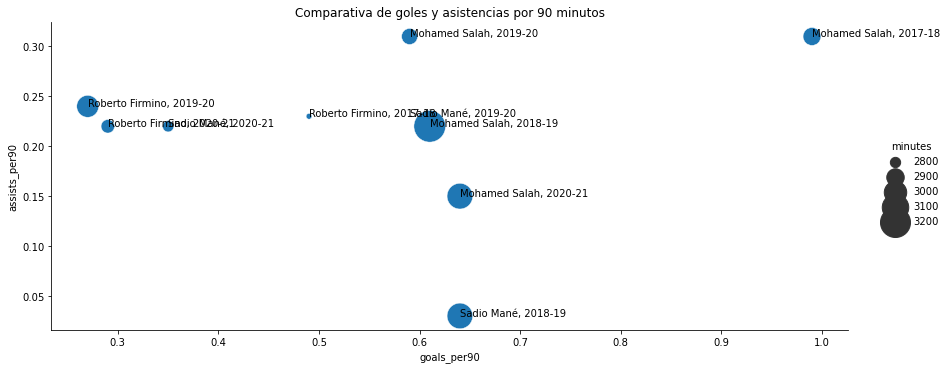

In [40]:
# Nos quedamos con los datos solamente de los delanteros del Liverpool
liverpool = players[players.squad=="Liverpool"]
liverpool = liverpool[liverpool.position=="FW"]

ax = sns.relplot(x=liverpool["goals_per90"], y=liverpool["assists_per90"], size=liverpool.minutes, sizes=(1, 1000), data=liverpool, aspect = 24/10)
plt.title('Comparativa de goles y asistencias por 90 minutos')
label_point(liverpool["goals_per90"], liverpool["assists_per90"], liverpool.player, plt.gca())   
plt.show()

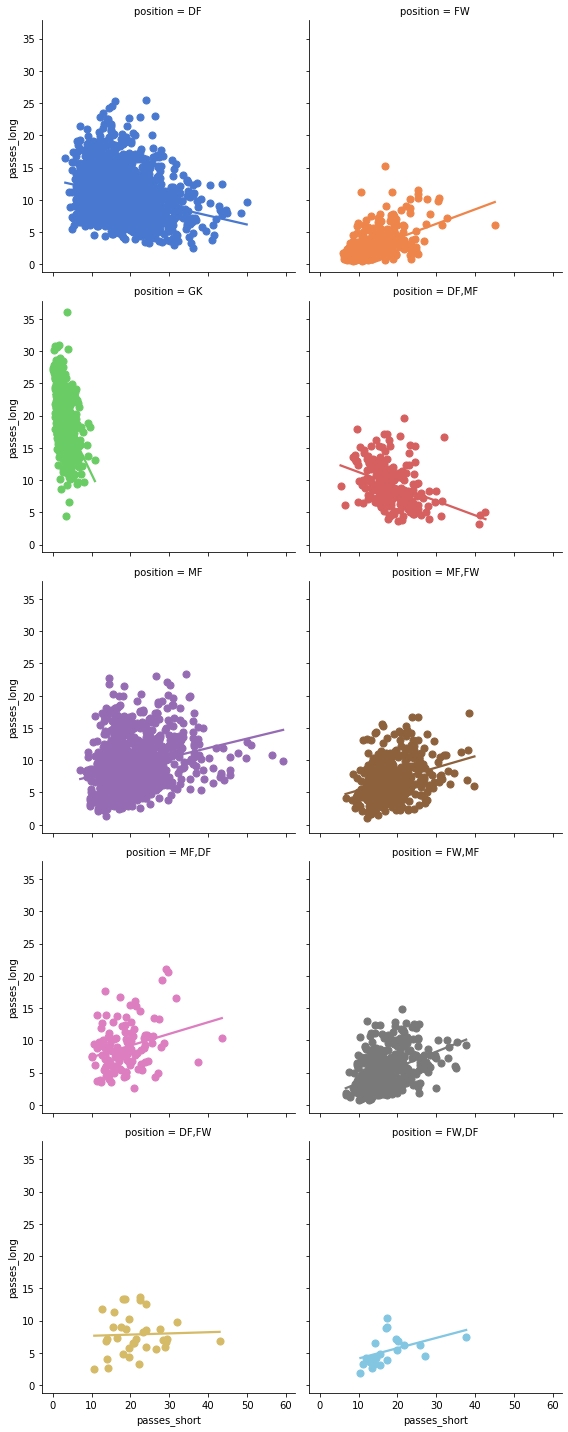

In [33]:
sns.lmplot(x="passes_short", y="passes_long", col="position", hue="position", data=players,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()